## **Tugas Besar Statistika**

Kelas : IF-44-GAB02

Kelompok 13:

Farhan Tirta Kesumah - 1301204108

Hafian Fathul Madani - 1301204116

Mayer Reflino Sitorus - 1301204103

Ryan Chandra Hadi - 1301204125


# Pendahuluan
---

*   Dengan adanya tugas besar yang telah diberikan oleh Bapak JONDRI, S.Si.,M.Si. kita diharapkan mampu mengolah data, menganalisis data, dan mendeskripsikan data yang telah diberikan. Pada kesempatan kali ini, data yang diberikan bernama *BankChurners* yang berisikan lebih dari 10 ribu nasabah dan mempunyai 21 sub kategori di setiap data nasabah tersebut. kumpulan data tentang prilaku nasabah tersebut dimulai dari data penggunaan yang berisikan *credit limit*, *card category*, *month inactive*, dan masih banyak lagi.

*   Sebagai contoh, Data Credit Limit ini memiliki data yang berisi batas penggunaan yang dapat dilakukan oleh nasabah, dalam hal ini dihitung dalam jangka per-satu bulan. Ada Card Category juga yang berarti data nasabah tentang jenis kategori kartu yang digunakan. Serta ada juga Month Inactive yang berisikan berapa lama nasabah tidak menggunakan kartu kreditnya selang satu tahun. 

---

# Tujuan

Suatu Bank ingin mendapatkan sebuah gambaran mengenai karakter dari setiap nasabah, berdasarkan data yang telah diberikan yang bernama BankChurners, data tersebut diharapkan dapat menjadi acuan pihak bank itu sendiri untuk mengambil langkah yang tepat agar *customer* bisa bertahan dan tidak berhenti berlangganan. 









# Install dan Load Packages

In [ ]:
#Install
install.packages('dplyr')
install.packages('ggplot2')
install.packages("GGally")
install.packages("ggpubr")
install.packages("hrbrthemes")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘extrafont’




In [ ]:
#Load
library(dplyr)
library(ggplot2)
library(GGally)
library(ggpubr)
library(hrbrthemes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



# Mengimport Data Bank Churners

In [ ]:
#Load CSV data from GitHub
bacu = read.csv('https://raw.githubusercontent.com/farhantk/tubesstatistika/main/BankChurners.csv')
glimpse(bacu)

Rows: 10,127
Columns: 22
$ CLIENTNUM                <int> 768805383, 818770008, 713982108, 769911858, …
$ Attrition_Flag           <chr> "Existing Customer", "Existing Customer", "E…
$ Customer_Age             <int> 45, 49, 51, 40, 40, 44, 51, 32, 37, 48, 42, …
$ Gender                   <chr> "M", "F", "M", "F", "M", "M", "M", "M", "M",…
$ Dependent_count          <int> 3, 5, 3, 4, 3, 2, 4, 0, 3, 2, 5, 1, 1, 3, 2,…
$ Education_Level          <chr> "High School", "Graduate", "Graduate", "High…
$ Marital_Status           <chr> "Married", "Single", "Married", "Unknown", "…
$ Income_Category          <chr> "$60K - $80K", "Less than $40K", "$80K - $12…
$ Card_Category            <chr> "Blue", "Blue", "Blue", "Blue", "Blue", "Blu…
$ Months_on_book           <int> 39, 44, 36, 34, 21, 36, 46, 27, 36, 36, 31, …
$ Total_Relationship_Count <int> 5, 6, 4, 3, 5, 3, 6, 2, 5, 6, 5, 6, 3, 5, 5,…
$ Months_Inactive_12_mon   <int> 1, 1, 1, 4, 1, 1, 1, 2, 2, 3, 3, 2, 6, 1, 2,…
$ Contacts_Count_12_mon    

# Pie Chart dan Bar Plot


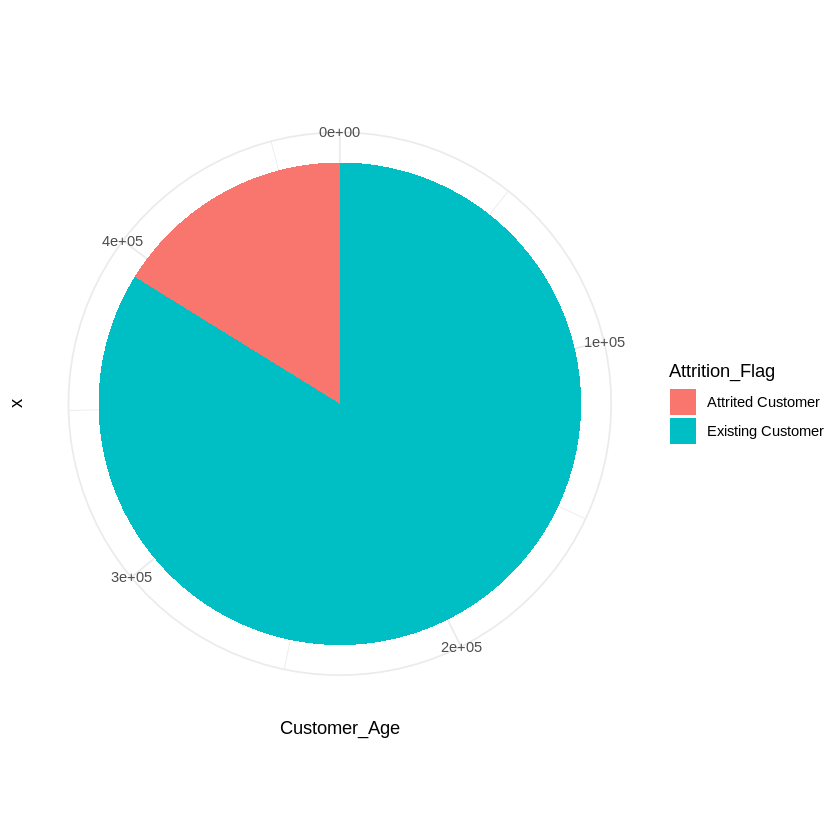

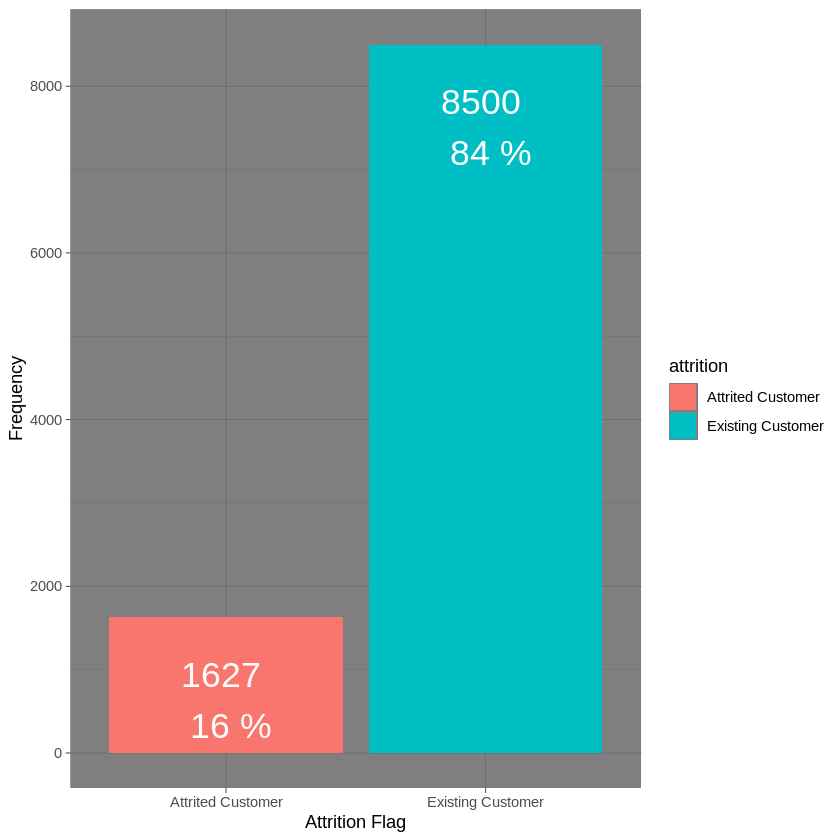

In [ ]:
theme_set(theme_minimal())
ggplot(bacu, aes(x = "", y = Customer_Age, fill = Attrition_Flag)) +
geom_bar(stat = "identity") +
coord_polar("y")

data <- setNames(as.data.frame(table(bacu$Attrition_Flag)), c("att_cat", "ct"))
df <- data.frame(
  attrition = data$att_cat,
  ct = data$ct,
  total_pelanggan = sum(data$ct)
)

percentage <- round(100*df$ct/sum(df$ct))
percentage <- paste(percentage, "%")

ggplot(data=df, aes(x=attrition, y=ct, fill=attrition)) +
  geom_bar(stat="identity")+
  geom_text(aes(label=paste(ct,"\n",percentage)), vjust=1.6, color="white", size=7.5)+
  labs(x="Attrition Flag", y = "Frequency", fill="attrition")+
  theme_dark()

Pie Chart ini menampilkan gambaran tentang banyaknya nasabah yang masih berlangganan dan nasabah yang telah keluar dari bank tersebut. warna orange menggambarkan seberapa besar nasabah yang sudah keluar sebanyak 1627 nasabah, sedangkan warna biru menggambarkan nasabah yang masih bertahan dan memiliki 8500 nasabah. Data tersebut kita buat dengan tujuan ingin memberitahu bahwa nasabah yang pindah Bank atau berhenti sebanyak hampir 20 persen.

# Correlation Map

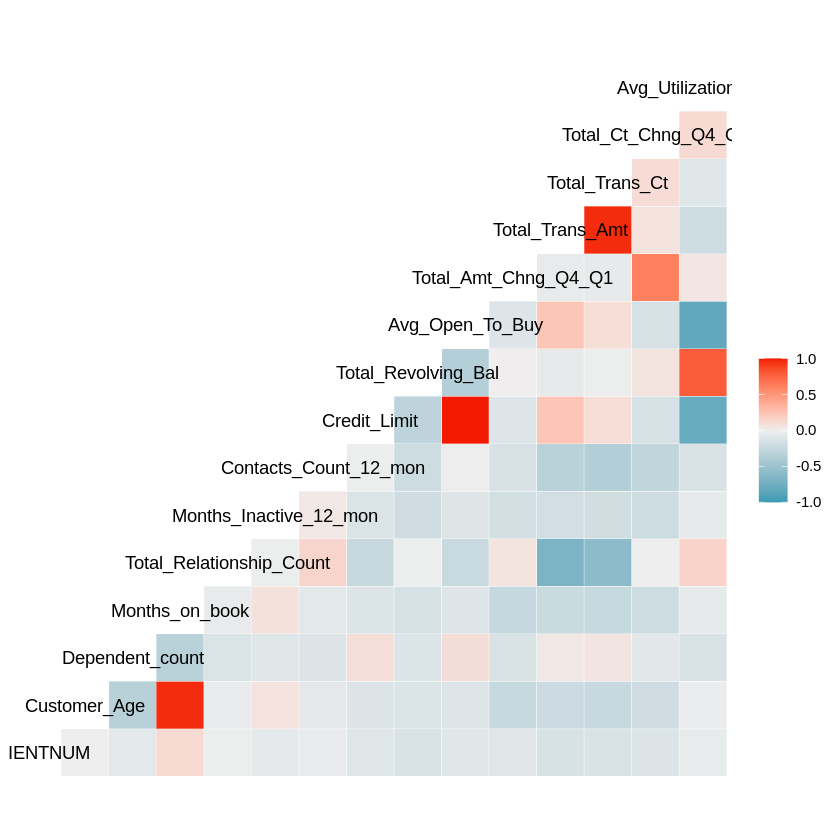

In [ ]:
newData <- cor(bacu[sapply(bacu, is.numeric)])
ggcorr(newData, method = c("everything", "pearson"))

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:

Dalam data ini kita menambahkannya agar mempermudah kita dalam melihat 
korelasi antar data. Dalam grafik tersebut warna menentukan seberapa besar korelasi yang dimiliki. 


          *   Catatan: Semakin merah warna pada suatu grafik, menandakan korelasi yang dimiliki antar data semakin kuat. 








# Scatter Plot

Dalam data tersebut 

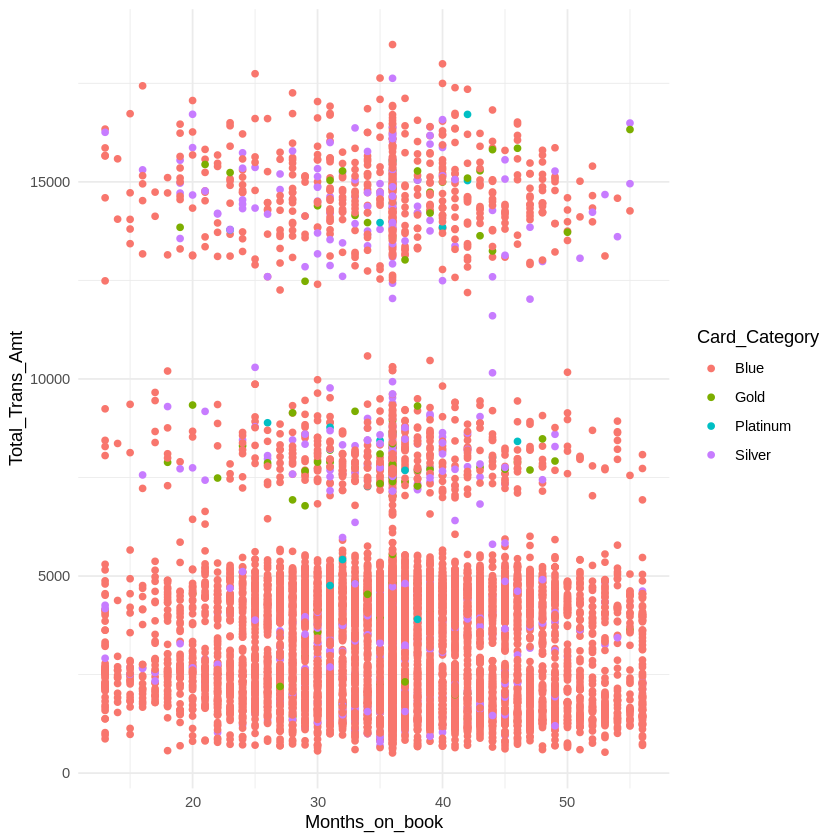

In [ ]:
SemiScat <- within(bacu, {
Card_Category <- factor(Card_Category)
})
Scat <- ggplot(SemiScat) +
geom_point(aes(x=Months_on_book, y=Total_Trans_Amt, colour = Card_Category))
Scat + theme_minimal()

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:


1.   Total transaksi yang dilakukan oleh para nasabah cenderung berada di bawah 
angka 5000$ 
2.   Pada data ini "Month on book" yang dilakukan oleh para nasabah cenderung berada di sekitar angka 30-40.







# Bar Plot

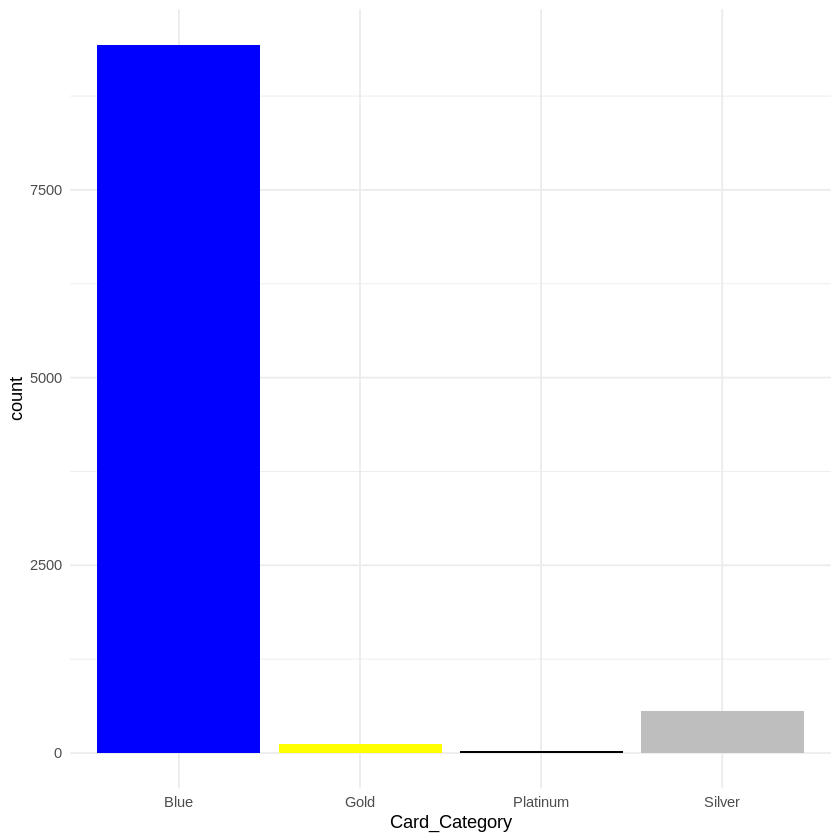

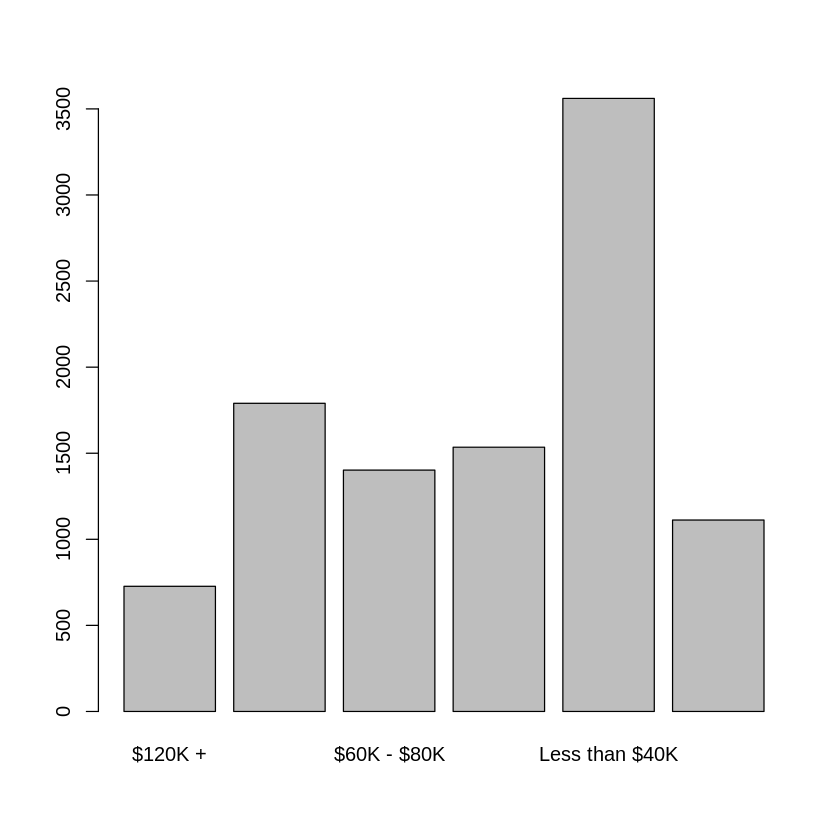

In [ ]:
 ggplot(bacu, aes(Card_Category, fill=Card_Category )) +  
  geom_bar( ) +
  scale_fill_manual(values = c("blue", "yellow", "black","grey") ) +
  theme(legend.position="none")

  barplot(table(bacu$Income_Category))

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:


*   Pengguna kartu kredit mayoritas masih memakai kartu dengan kategori "blue" dan "platinum" memiliki jumlah pengguna paling sedikit jika dibandingkan dengan "gold", "silver", dan "blue". 

*   Pada grafik ke-2 pendapatan nasabah mayoritas berada di bawah 40 ribu dollar. 


# Density Plot

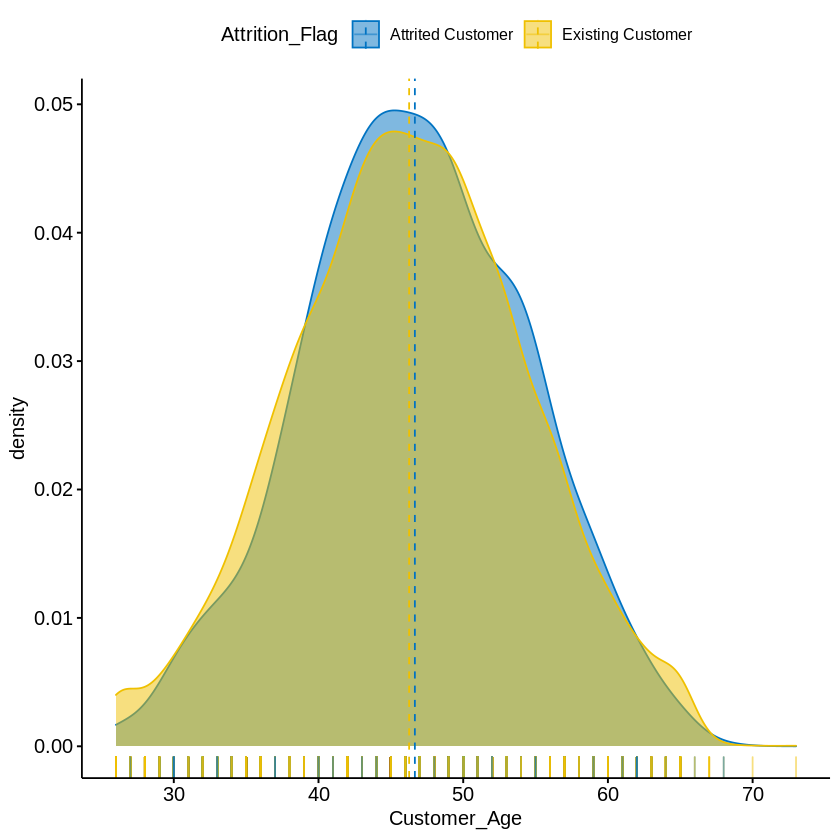

In [ ]:
ggdensity(bacu, x = "Customer_Age", add = "mean", rug = TRUE, color = "Attrition_Flag", fill = "Attrition_Flag", palette = "jco")

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:

*  **Data tersebut menyajikan bahwa keluarnya nasabah pada bank tersebut tidak dipengaruhi oleh umur nasabah, terbukti bahwa kepadatan data yang dimiliki oleh nasabah yang keluar dan nasabah yang tidak keluar memiliki kepadatan yang cenderung hampir sama.**






# Time Series Plot

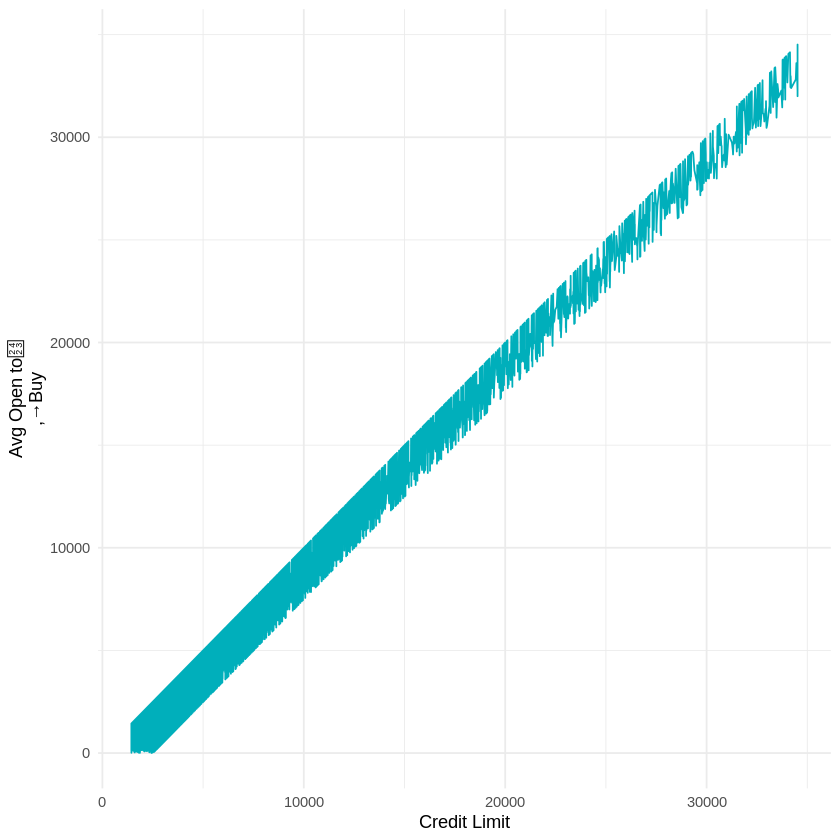

In [ ]:
TS <- ggplot(bacu, aes(x=Credit_Limit)) +
geom_line(aes(y=Avg_Open_To_Buy), color = "#00AFBB") + labs(y="Avg Open to␣
,→Buy", x="Credit Limit")
TS + theme_minimal()

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:
    

**Semakin tinggi batasan kredit yang dimiliki oleh nasabah, maka semakin tinggi juga sisa penggunaan yang dapat digunakan pada nasabah tersebut. Data ini menunjukan bahwa bertambah nya limit dari suatu kartu kredit tidak menambah persentase penggunaan kartu kredit tersebut, terbukti dari data tersebut walaupun sudah memiliki kartu dengan limit yang besar, nasabah tidak menggunakan kartu kredit itu dengan penuh.**

# Scatter Plot

Warning message:
“Use of `bacu$Total_Trans_Ct` is discouraged. Use `Total_Trans_Ct` instead.”
Warning message:
“Use of `bacu$Total_Trans_Amt` is discouraged. Use `Total_Trans_Amt` instead.”
Warning message:
“Use of `bacu$Total_Trans_Ct` is discouraged. Use `Total_Trans_Ct` instead.”
Warning message:
“Use of `bacu$Total_Trans_Amt` is discouraged. Use `Total_Trans_Amt` instead.”
`geom_smooth()` using formula 'y ~ x'



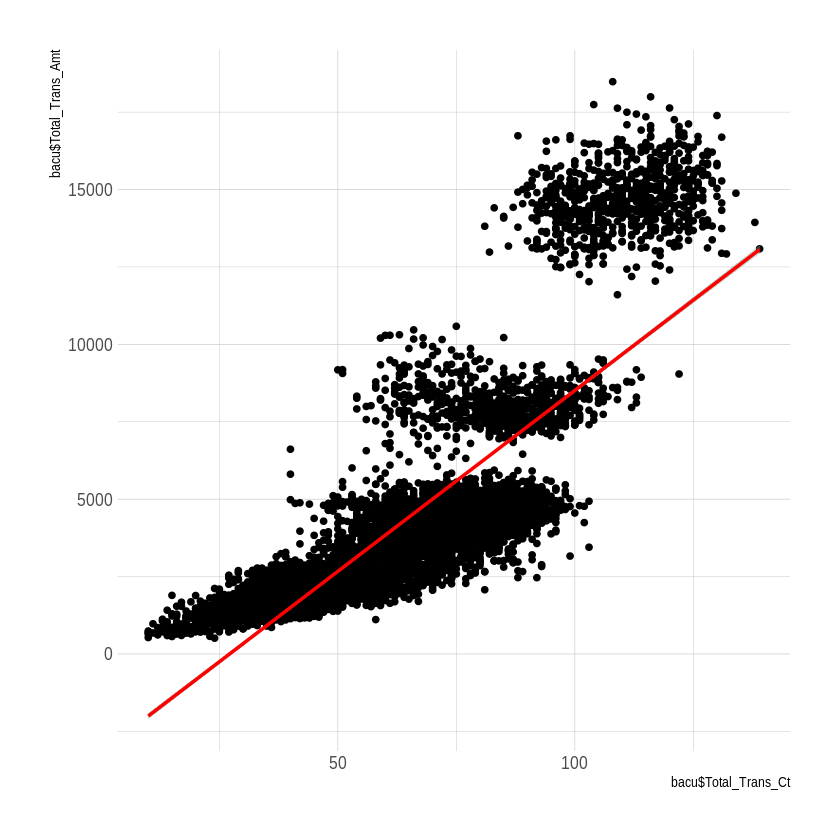

In [ ]:
ggplot(bacu, aes(x=bacu$Total_Trans_Ct, y=bacu$Total_Trans_Amt)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  theme_ipsum()

Data tersebut setelah kita analisis menghasilkan kesimpulan bahwa:

**Pada bagian Correlation Map yang sebelumnya sudah dijelaskan. Kita bisa melihat korelasi antara "Total Trns Ct" dan "Total Trns Amt" memiliki korelasi yang cukup kuat. Dari grafik tersebut menunjukan adanya kenaikan angka pada Total Trns Ct yang berbanding lurus dengan Total Trns Amt. ** 




>    1.   Total Trns Ct berarti total berapa kali transaksi yang dilakukan kurun waktu satu tahun.  



>   2.   Total Trns Amt berarti total transaksi yang dilakukan kurun waktu satu tahun (dalam bentuk uang).












